In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.cm
from scipy.stats import norm

cm = plt.cm.get_cmap('Reds')
cm1 = plt.cm.get_cmap('Blues')
cm2  = plt.cm.get_cmap('Purples')
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']

#database

#TCA
TCA_c = [1.5e-10, 1.5e-9, 1.5e-8, 1.5e-7,1.5e-6,1.5e-5]
TCA_s = [0.05, 0.24, 0.3, 0.45, 0.58, 0.75]

#TBA
TBA_c = [1e-9, 1e-6, 1e-5]
TBA_s = [0.19,0.35,0.7]

#phenol
Phenol_c = [1e-9,1e-8,1e-7,1e-6]
Phenol_s = [0.05,0.3,0.5,0.8]

#TCP
TCP_c = Phenol_c
TCP_s = [0.01, 0.32, 0.85, 0.72]

#TCPT
TCPT_c = [1e-10,1e-9,1e-8,1e-7,1e-6]
TCPT_s = [0.08, 0.2, 0.38, 0.6, 0.98]

#LCD
LCD_c = [1e-8,1e-7,1e-6,1e-5,1e-4]
LCD_s = [0.1,0.26,0.31,0.55, 0.7]

#Ger
Ger_c = [1e-7,1e-6,1e-5,1e-4,5e-4,2e-3]
Ger_s = [0.01,0.27,0.25, 0.625,0.91,0.8]

#TBP
#TBP_c = [ 1e-5,1e-4]
#TBP_s = [0.38,0.62]

#EthBz
#EthBz_c = [5e-6,1e-4]
#EthBz_s = [0.15,0.37]

In [2]:
def mixture_response(K1, K2, e1, e2,n):
    X1 = np.logspace(-4,4,80)
    X2 =  np.logspace(-4,4,80) 
    return 1.0/(1.0 + ((1.0 + X1/K1 + X2/K2)/(e1*X1/K1 + e2*X2/K2))**n)

def mono_response(K1,e1,n):
    X1 = np.logspace(-4,4,80)
    return 1.0/(1.0 + ((1.0 + X1/K1)/(e1*X1/K1))**n)

def mono_response_m(K1,e1,n, Km1, nm, em):
    X1 = np.logspace(-4,4,80)
    e1 = e1*((1 - em*(1/(1 + Km1/X1)))**nm)
    return 1.0/(1.0 + ((1.0 + X1/K1)/(e1*X1/K1))**n)

def mixture_response_m(K1, K2, e1, e2,n, Km1, em1,Km2, em2,nm):
    X1 = np.logspace(-4,4,80)
    X2 =  np.logspace(-4,4,80) 
    em = (em1*(X1/Km1) + em2*(X2/Km2))/(1 + (X1/Km1) + (X2/Km2))
    e1 = e1*(1 - em)**nm
    e2 = e2*(1 - em)**nm
    print(em)
    return 1.0/(1.0 + ((1.0 + X1/K1 + X2/K2)/(e1*X1/K1 + e2*X2/K2))**n)

def supp_ratio(e1,n, Km, em1, nm1) :
    M = Km*np.logspace(-9,6,100)
    e2 = e1*((1 - em1*(1/(1 + Km/M)))**nm1)
    FM = (1.0 + np.exp(-n*np.log(e1)))/(1.0 + np.exp(-n*np.log(e2)))
    return np.array([M,1.0 - FM])

def supp_ratio_fitting(M,e1,n, Km, em1, nm1) :
    e2 = e1*((1 - em1*(1/(1 + Km/M)))**nm1)
    FM = (1.0 + np.exp(-n*np.log(e1)))/(1.0 + np.exp(-n*np.log(e2)))
    return 1.0 - FM

In [52]:
#Figure 3: Masking fits
import scipy.optimize as optimization

def func(x,Km,em,nm):
    return supp_ratio_fitting(x,1,4,Km,em,nm)

xdata = TCA_c
ydata = TCA_s
x0 = [1e-3,0.5,1]
xmin = [1e-12,0,0.01]
xmax = [1e-2,1,1]
params, cov =  optimization.curve_fit(func, xdata, ydata,  x0, bounds = (xmin,xmax))
m,fm = supp_ratio(1,4,1e-5, 1, 1.0/4.0)
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (8,6))
ms = 18
lw = 6
alph = 1
M = np.logspace(-10,-2,100)
plt.semilogx(xdata, ydata,'bo', markeredgewidth = 0, markersize = ms, alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'b-', lw = lw, alpha = 0.5)
print(params)
xdata = TBA_c
ydata = TBA_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'ro', markeredgewidth = 0, markersize = ms)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'r-', lw = lw, alpha = 0.5)
print(params)
xdata = Phenol_c
ydata = Phenol_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'yo', markeredgewidth = 0, markersize = ms, alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'y-', lw = lw, alpha = 0.5)
print(params)
xdata = TCP_c
ydata = TCP_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'mo', markeredgewidth = 0, markersize = ms, alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'm-', lw = lw, alpha = 0.5)
print(params)
xdata = TCPT_c
ydata = TCPT_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'co', markeredgewidth = 0, markersize = ms, alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'c-', lw = lw, alpha = 0.5)
print(params)
xdata = LCD_c
ydata = LCD_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'ko', markeredgewidth = 0, markersize = ms, alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'k-', lw = lw, alpha = 0.5)
print(params)

xdata = Ger_c
ydata = Ger_s
params, cov =  optimization.curve_fit(func, xdata, ydata, x0, bounds = (xmin,xmax))
plt.semilogx(xdata, ydata,'go', markeredgewidth = 0, markersize = ms,alpha = 0.7)
plt.semilogx(M, func(M,params[0], params[1], params[2]), 'g-', lw = lw, alpha = 0.5)

plt.ylim(0,1.05)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))

axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

#axis.xaxis.set_major_locator(MultipleLocator(2))

axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.set_xticks([1e-10,1e-6,1e-2])
axis.spines['left'].set_bounds(0,1)
axis.spines['bottom'].set_bounds(1e-10,1e-2)


fig.savefig("fig3_masking_fit.eps")
#plt.show()

[  1.60742805e-08   3.95259404e-01   7.37232074e-01]
[  2.74019453e-07   1.00000000e+00   1.19460190e-01]
[  2.68456128e-08   3.78667150e-01   1.00000000e+00]
[  1.53103827e-08   4.80556713e-01   8.85226576e-01]
[  2.20216097e-08   4.80768226e-01   1.00000000e+00]
[  7.41427246e-09   9.99999944e-01   4.23014296e-02]


/usr/local/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [51]:
#Figure 3: Non-competitive interactions
plt.close("all")
fig,axis= plt.subplots(1,1,figsize = (8,6))

n = 4

##agonists
K1 = 1
K2 = 1
e1 = 5
e2 = 1

#inhibition
# Km1 = 1e-5
# nm = 1
# Km2 = 1e0
# em1 = 0.7
# em2 = 0.0

#synergy
Km1 = 1e-2
nm = 1
Km2 = 1e-5
nm2 = 1
em1 = 0.7
em2 = 0.0

X1 = mono_response(K1,e1,n)
X2 = mono_response(K2,e2,n)
Xm1 = mono_response_m(K1,e1,n, Km1, nm, em1)
Xm2 = mono_response_m(K2,e2,n, Km2, nm, em2)

X12 = mixture_response(K1,K2,e1,e2,n)
Xm12 = mixture_response_m(K1,K2,e1,e2,n,Km1, em1,Km2, em2, nm)
conc1 = np.logspace(-4,4,80)
conc12 = 2*np.logspace(-4,4,80)


#axis.semilogx(conc1, X1, 'b--',  alpha = 0.3)
#axis.semilogx(conc1, X2, 'r--', alpha = 0.3)
#axis.semilogx(conc12, X12,'m--', alpha = 0.3)
axis.semilogx(conc1, Xm1, 'C0-',lw = 7, label = "Odor 1")
axis.semilogx(conc1, Xm2, 'C1-', lw = 7,label = "Odor 2")
axis.semilogx(conc12, Xm12,'C4-', lw = 7,label = "Odors 1+2")
axis.set_ylim(0,1.05)
axis.set_xlim(1e-1,1e3)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))

axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

#axis.xaxis.set_major_locator(MultipleLocator(2))

axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.set_xticks([1e-1,1e1,1e3])
axis.spines['left'].set_bounds(0,1)
axis.spines['bottom'].set_bounds(1e-1,1e3)
#fig.savefig("synergy_mask.png", dpi = 200)

#axis.set_title("Inhibition", fontsize = 16)
fig.savefig("fig4_masking_synergy.eps")
#plt.show()

[ 0.00063579  0.00064803  0.00065806  0.00066623  0.00067285  0.00067819
  0.00068247  0.0006859   0.00068865  0.00069084  0.00069258  0.00069397
  0.00069507  0.00069595  0.00069664  0.00069719  0.00069763  0.00069798
  0.00069825  0.00069847  0.00069864  0.00069878  0.00069889  0.00069897
  0.00069904  0.0006991   0.00069914  0.00069917  0.0006992   0.00069922
  0.00069924  0.00069925  0.00069926  0.00069927  0.00069928  0.00069928
  0.00069928  0.00069929  0.00069929  0.00069929  0.00069929  0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993   0.0006993   0.0006993   0.0006993   0.0006993
  0.0006993   0.0006993 ]


In [3]:
#Figure 3: Time trace for masking
#unit in seconds
#Parameters
numodors = 2

k1 = np.zeros(numodors)
km1 = np.zeros(numodors)
k2 = np.zeros(numodors)
km2 = np.zeros(numodors)
kappa= np.zeros(numodors)
eta = np.zeros(numodors)

k1[0] = 1/(0.010)
km1[0] = 1/(0.010) 
k2[0] = 1/(0.5)
km2[0] = 1/(0.5)

kappa[0] = (km1[0]/k1[0])*(km2[0]/k2[0])/(1.0 + (km2[0]/k2[0]))

#agonist
k1[1] =  1/(0.010)
km1[1] = 1/(0.010) 
k2[1] = 0.3/(0.5)
km2[1] = 0.05/(0.5)

kappa[1] = (km1[1]/k1[1])*(km2[1]/k2[1])/(1.0 + (km2[1]/k2[1]))


KC = 1/(0.5)
delC = 1/(1)

#KC = 1/(0.5)
#delC = 1/(1)

kG = 10

KCa = 1/(0.050)
delCa = 1/(3)

KCaM = 1/(1)
delCaM = 1/(3)

R0 = 1
n = 4
CaM0 = 0.05
nini = 2

eta[0] = KC*kG*R0/(1.0 + (km2[0]/k2[0]))
eta[1] = KC*kG*R0/(1.0 + (km2[1]/k2[1]))

def response_odor(c, eta, kappa):
    return 1.0/(1.0 + ((1.0 + c/kappa)/(eta*c/kappa))**n)

def response_mixture(c, eta, kappa):
    kappa_sum = 1.0 + np.sum(c/kappa, axis = 0)
    etakappa_sum = np.sum(c*eta/kappa, axis = 0)
    return 1.0/(1.0 + (kappa_sum/etakappa_sum)**n)


def integrate(T,dt, Xc, stimtime, secpulsetime, secpulse, k1,k2,km1,km2, odorindex):
    numsteps = int((T+1)/dt)
    times = np.linspace(-1,T,numsteps)
    R = np.zeros(numsteps)
    R[0]= R0
    B = np.zeros(numsteps)
    A = np.zeros(numsteps)

    C = np.zeros(numsteps)
    CNG = np.zeros(numsteps)

    Ca = np.zeros(numsteps)
    CaM = np.zeros(numsteps)
    
    X = Xc*np.zeros(numsteps)
    for i in range(numsteps):
        if times[i] < 0:
            continue
        if times[i] < stimtime:
            X[i] = Xc
        elif secpulse == 1 and times[i] > stimtime + secpulsetime and times[i] < stimtime + secpulsetime + stimtime:
            X[i] = Xc

    for i in range(1,numsteps):
        R[i] = R[i-1] + dt*(km1[odorindex]*B[i-1] - k1[odorindex]*R[i-1]*X[i-1])
        B[i] = B[i-1] + dt*(k1[odorindex]*R[i-1]*X[i-1] + km2[odorindex]*A[i-1] - km1[odorindex]*B[i-1] - k2[odorindex]*B[i-1])
        A[i] = A[i-1] + dt*(k2[odorindex]*B[i-1] - km2[odorindex]*A[i-1])

        C[i] = C[i-1] + dt*(KC*A[i-1] - delC*C[i-1])

        CNG[i] = (C[i-1]**n)/(C[i-1]**n + ((1.0 + (CaM[i-1]/CaM0)**nini)/kG)**n)
        Ca[i] = Ca[i-1] + dt*(KCa*CNG[i-1] - delCa*Ca[i-1] - KCaM*Ca[i-1])
        CaM[i] = CaM[i-1] + dt*(KCaM*Ca[i-1] - delCaM*CaM[i-1])
    return C, Ca



def integrate_mix(T,dt, Xc, stimtime, secpulsetime, secpulse, k1,k2,km1,km2, numodors):
    numsteps = int((T+1)/dt)
    times = np.linspace(-1,T,numsteps)
    R = np.zeros(numsteps)
    R[0]= R0
    B = np.zeros((numodors,numsteps))
    A = np.zeros((numodors,numsteps))

    C = np.zeros(numsteps)
    CNG = np.zeros(numsteps)

    Ca = np.zeros(numsteps)
    CaM = np.zeros(numsteps)
    
    X = Xc*np.zeros(numsteps)
    for i in range(numsteps):
        if times[i] < 0:
            continue
        if times[i] < stimtime:
            X[i] = Xc/numodors
        elif secpulse == 1 and times[i] > stimtime + secpulsetime and times[i] < stimtime + secpulsetime + stimtime:
            X[i] = Xc/numodors

    for i in range(1,numsteps):
        sumR = 0
        sumA = 0
        for j in range(numodors):
            sumR += km1[j]*B[j][i-1] - k1[j]*R[i-1]*X[i-1]
            B[j][i] = B[j][i-1] + dt*(k1[j]*R[i-1]*X[i-1] + km2[j]*A[j][i-1] - km1[j]*B[j][i-1] - k2[j]*B[j][i-1])
            A[j][i] = A[j][i-1] + dt*(k2[j]*B[j][i-1] - km2[j]*A[j][i-1])
            sumA += A[j][i]
            
        R[i] = R[i-1] + dt*(sumR)

        C[i] = C[i-1] + dt*(KC*sumA - delC*C[i-1])

        CNG[i] = (C[i-1]**n)/(C[i-1]**n + ((1.0 + (CaM[i-1]/CaM0)**nini)/kG)**n)
        Ca[i] = Ca[i-1] + dt*(KCa*CNG[i-1] - delCa*Ca[i-1] - KCaM*Ca[i-1])
        CaM[i] = CaM[i-1] + dt*(KCaM*Ca[i-1] - delCaM*CaM[i-1])
    return C, Ca 


def integrate_mix_mask_2odors(T,dt, Xc, Xm, stimtime, secpulsetime, secpulse, k1,k2,km1,km2, k_mask, km_mask, em_mask):
    numodors = 2
    numsteps = int((T+1)/dt)
    times = np.linspace(-1,T,numsteps)
    R = np.zeros(numsteps)
    R[0]= R0
    B = np.zeros((numodors,numsteps))
    A = np.zeros((numodors,numsteps))

    C = np.zeros(numsteps)
    CNG = np.zeros(numsteps)

    Ca = np.zeros(numsteps)
    CaM = np.zeros(numsteps)
    
    M = np.zeros(numsteps)
    
    X = Xc*np.zeros((numodors,numsteps))
    for i in range(numsteps):
        if times[i] < 0:
            continue
        if times[i] < stimtime:
            X[0,i] = Xc
        if secpulse == 1 and times[i] > stimtime + secpulsetime and times[i] < stimtime + secpulsetime + stimtime:
            X[1,i] = Xm

    for i in range(1,numsteps):
        sumR = 0
        sumA = 0
        for j in range(numodors):
            sumR += km1[j]*B[j][i-1] - k1[j]*R[i-1]*X[j][i-1]
            B[j][i] = B[j][i-1] + dt*(k1[j]*R[i-1]*X[j][i-1] + km2[j]*A[j][i-1] - km1[j]*B[j][i-1] - k2[j]*B[j][i-1])
            A[j][i] = A[j][i-1] + dt*(k2[j]*B[j][i-1] - km2[j]*A[j][i-1])
            sumA += A[j][i]
            
        R[i] = R[i-1] + dt*(sumR)

        C[i] = C[i-1] + dt*(KC*sumA - delC*C[i-1])
        kGM = kG*(1.0 - M[i-1]*em_mask)
        CNG[i] = (C[i-1]**n)/(C[i-1]**n + ((1.0 + (CaM[i-1]/CaM0)**nini)/kGM)**n)
        Ca[i] = Ca[i-1] + dt*(KCa*CNG[i-1] - delCa*Ca[i-1] - KCaM*Ca[i-1])
        CaM[i] = CaM[i-1] + dt*(KCaM*Ca[i-1] - delCaM*CaM[i-1])
        
        M[i] = M[i-1] + dt*(k_mask*X[1][i-1]*(1.0 - M[i-1]) - km_mask*M[i-1])
        
        
    return C, Ca , M , CNG, CaM

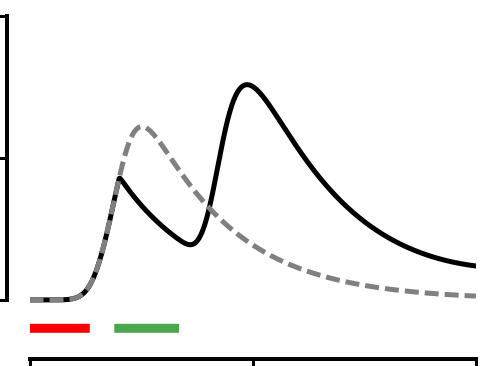

In [54]:
#Fig3 Panel 1: Inhibition by odorants 
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (8,6))


Xc = 0.1
Xm = 0.5

dt = 0.0001
T = 4
stimtime = 0.5
secpulsetimes = 0.3
secpulse = 1

k_mask = 10/(0.1)
km_mask = 1/(0.3)
em_mask = 1.0

numsteps = int((T+1)/dt)
times = np.linspace(-1,T,numsteps)

Cs1 = np.zeros(numsteps)
Cas1 = np.zeros(numsteps)

Cs2 = np.zeros(numsteps)
Cas2 = np.zeros(numsteps)

Cs1, Cas1, M, CNG,CaM = integrate_mix_mask_2odors(T,dt,Xc, Xm, stimtime, secpulsetimes,secpulse,k1,k2,km1,km2, k_mask, km_mask, em_mask)
#axis.plot(times, M, '-', color = 'g', lw = 2, alpha = 0.5)

axis.plot(times, Cas1, 'k-', color = 'k', lw = 5, alpha = 1)

Cs2, Cas2, M, CNG,CaM = integrate_mix_mask_2odors(T,dt,Xc, Xm, stimtime, secpulsetimes,0,k1,k2,km1,km2, k_mask, km_mask, em_mask)
axis.plot(times, Cas2, 'k--', color = 'gray', lw = 5, alpha = 1 )
secstim = times[(times > secpulsetimes + stimtime)*(times < secpulsetimes + 2*stimtime)]
axis.plot(secstim , -0.02*np.ones(len(secstim)), 'g-', lw = 9, alpha = 0.7)
    
stim = times[(times < stimtime)*(times > 0)]
axis.plot(stim , -0.02*np.ones(len(stim)), 'r-', lw = 9, alpha = 1)

axis.set_ylim(-0.03,0.2)
axis.set_xlim(0,T)
#axis.set_xlabel("Time (seconds)", fontsize = 18)
#axis.set_ylabel("Response", fontsize = 18)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))

axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.xaxis.set_major_locator(MultipleLocator(2))

axis.yaxis.set_major_locator(MultipleLocator(0.1))

axis.spines['left'].set_bounds(0,0.2)
axis.spines['bottom'].set_bounds(0,4)

#fig.tight_layout()
fig.savefig("fig3_mask_timeseries.eps")
plt.show()